In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
df=pd.read_csv('/Users/puravdoshi/Downloads/FDS Project/realistic_climate_change_impacts.csv')
df.head()

,RecordID,Date,Country,TemperatureAnomaly_C,CO2Level_ppm,ExtremeWeatherEvent,EconomicImpact_USD,PopulationAffected
0,07cecceb-69e6-47eb-a19b-34d6824cdea8,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036
1,a6e7e2a5-00ea-4af2-b151-a1a63386e436,2014-05-18,Australia,-0.03,376.37,Tornado,1379227.03,274952
2,6890cfe8-21d3-4c0d-9b6a-e543e308c06e,2002-04-15,Japan,0.55,362.97,Wildfire,1093567.72,4422930
3,ac61117f-9b84-4327-be46-67a8d84bca24,2013-10-13,India,-0.51,396.67,Flood,5260336.62,2122860
4,2df860a5-07e4-4832-a344-ae198276cdb8,2020-10-15,USA,1.78,367.59,Wildfire,4567592.01,2433756


In [18]:
df.isnull().sum()

RecordID                   0
Date                       0
Country                    0
TemperatureAnomaly_C       0
CO2Level_ppm               0
ExtremeWeatherEvent     1384
EconomicImpact_USD         0
PopulationAffected         0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df=df.drop(columns=['RecordID'])

In [21]:
# Fill missing values in ExtremeWeatherEvent with mode
mode_value = df['ExtremeWeatherEvent'].mode()[0]
df['ExtremeWeatherEvent'] = df['ExtremeWeatherEvent'].fillna(mode_value)

In [22]:
df.head()

,Date,Country,TemperatureAnomaly_C,CO2Level_ppm,ExtremeWeatherEvent,EconomicImpact_USD,PopulationAffected
0,2019-11-17,India,-0.15,410.44,Drought,8630289.48,375036
1,2014-05-18,Australia,-0.03,376.37,Tornado,1379227.03,274952
2,2002-04-15,Japan,0.55,362.97,Wildfire,1093567.72,4422930
3,2013-10-13,India,-0.51,396.67,Flood,5260336.62,2122860
4,2020-10-15,USA,1.78,367.59,Wildfire,4567592.01,2433756


In [23]:
df.isnull().sum()

Date                    0
Country                 0
TemperatureAnomaly_C    0
CO2Level_ppm            0
ExtremeWeatherEvent     0
EconomicImpact_USD      0
PopulationAffected      0
dtype: int64

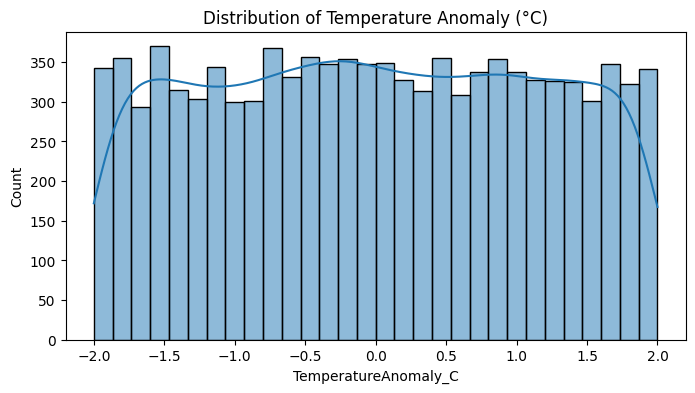

In [24]:
# Univariate Analysis (5 plots)
# 1. Histogram of Temperature Anomaly
plt.figure(figsize=(8,4))
sns.histplot(df['TemperatureAnomaly_C'], bins=30, kde=True)
plt.title("Distribution of Temperature Anomaly (°C)")
plt.show()

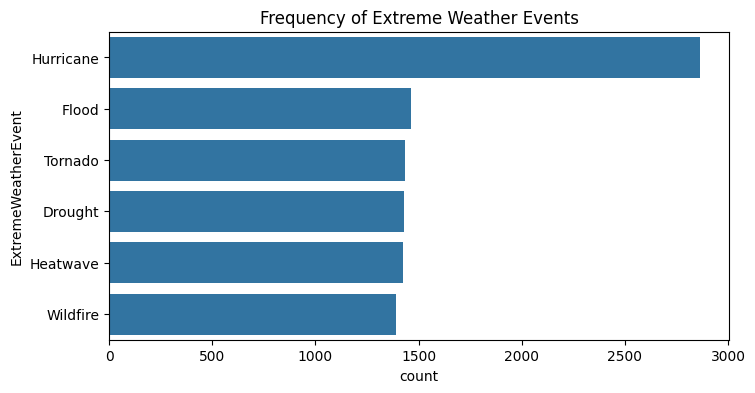

In [25]:
# 2. Bar plot of Extreme Weather Event frequencies
plt.figure(figsize=(8,4))
sns.countplot(y='ExtremeWeatherEvent', data=df, order=df['ExtremeWeatherEvent'].value_counts().index)
plt.title("Frequency of Extreme Weather Events")
plt.show()

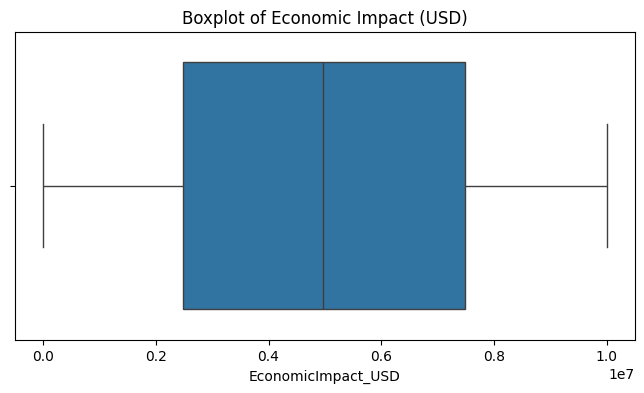

In [26]:
# 3. Boxplot of Economic Impact
plt.figure(figsize=(8,4))
sns.boxplot(x=df['EconomicImpact_USD'])
plt.title("Boxplot of Economic Impact (USD)")
plt.show()

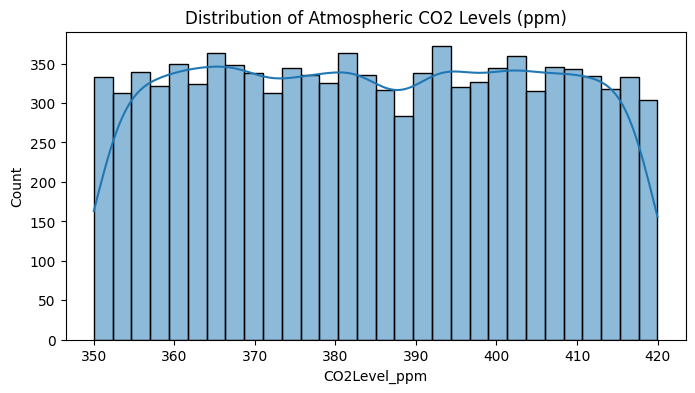

In [27]:
# 4. Histogram of CO2 levels
plt.figure(figsize=(8,4))
sns.histplot(df['CO2Level_ppm'], bins=30, kde=True)
plt.title("Distribution of Atmospheric CO2 Levels (ppm)")
plt.show()

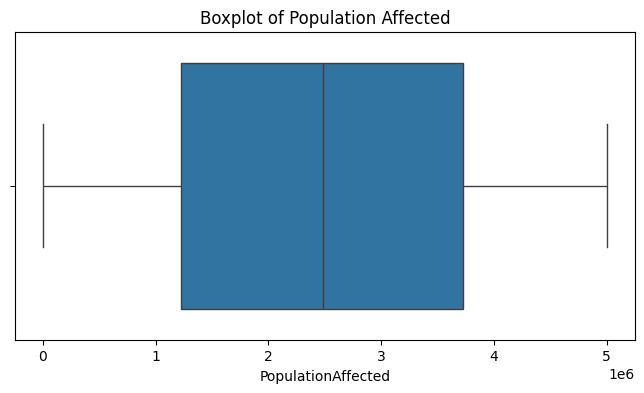

In [28]:
# 5. Boxplot of Population Affected
plt.figure(figsize=(8,4))
sns.boxplot(x=df['PopulationAffected'])
plt.title("Boxplot of Population Affected")
plt.show()

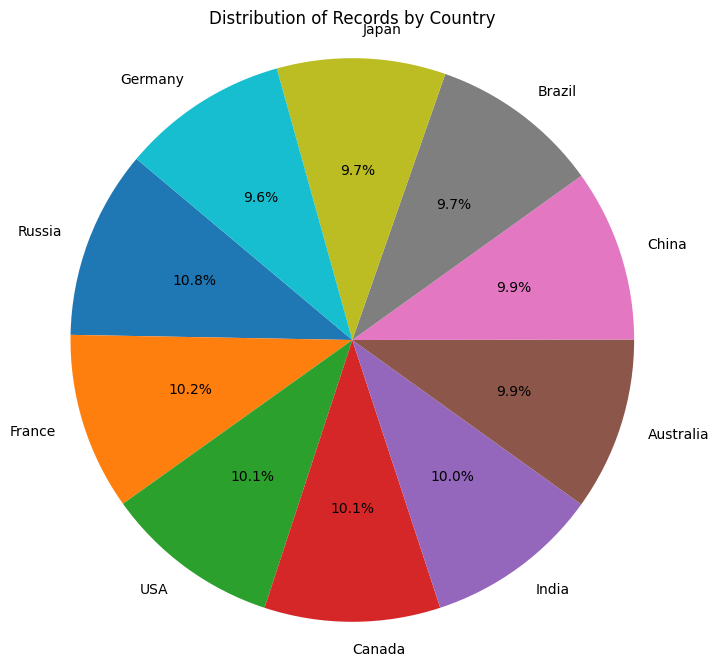

In [29]:
# Pie chart for Countries affected
country_counts = df['Country'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Records by Country')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

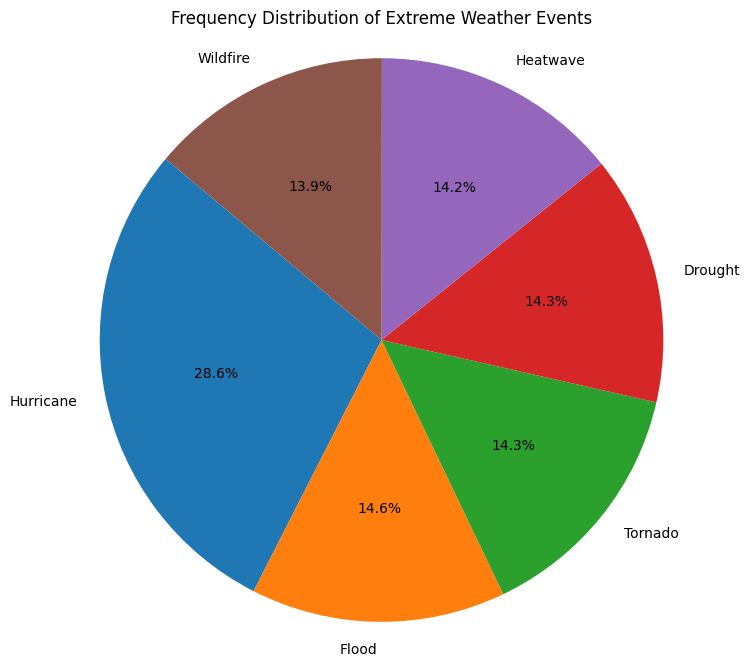

In [30]:
# Pie chart for Frequent Extreme Weather Events
event_counts = df['ExtremeWeatherEvent'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency Distribution of Extreme Weather Events')
plt.axis('equal')
plt.show()

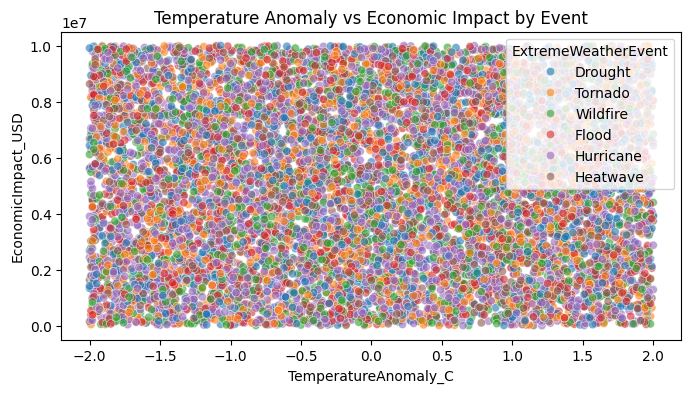

In [31]:
# Bivariate Analysis (5 plots)
# 1. Scatter plot between Temperature Anomaly and Economic Impact
plt.figure(figsize=(8,4))
sns.scatterplot(x='TemperatureAnomaly_C', y='EconomicImpact_USD', data=df, hue='ExtremeWeatherEvent', alpha=0.6)
plt.title("Temperature Anomaly vs Economic Impact by Event")
plt.show()

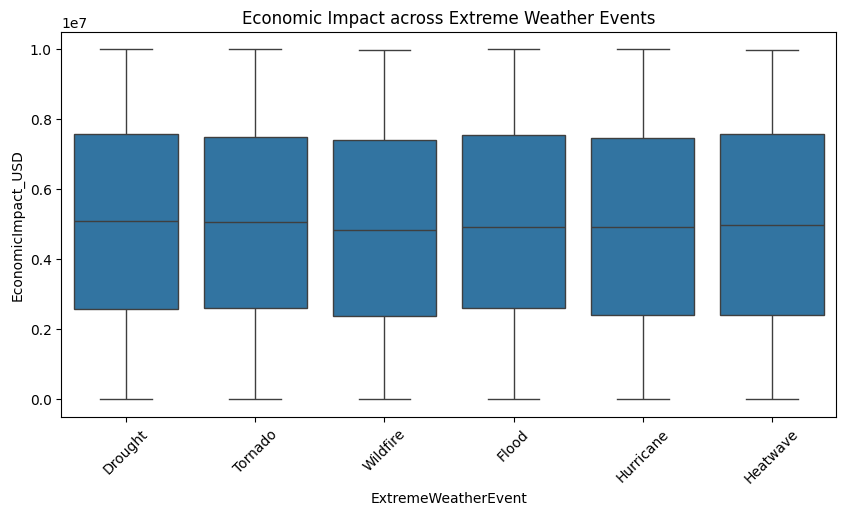

In [32]:
# 2. Boxplot of Economic Impact by ExtremeWeatherEvent
plt.figure(figsize=(10,5))
sns.boxplot(x='ExtremeWeatherEvent', y='EconomicImpact_USD', data=df)
plt.title("Economic Impact across Extreme Weather Events")
plt.xticks(rotation=45)
plt.show()

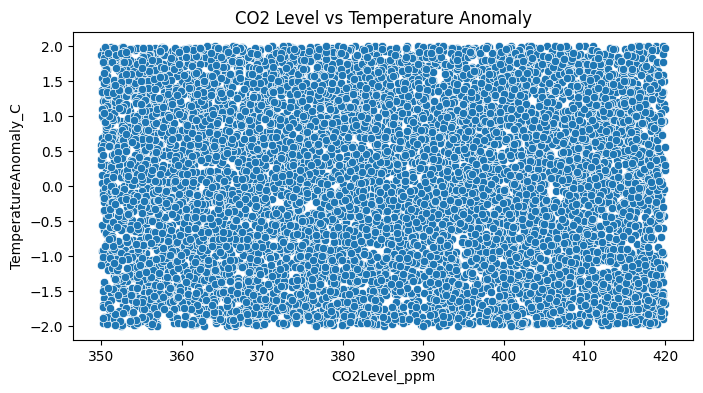

In [33]:
# 3. Scatter plot between CO2 Level and Temperature Anomaly
plt.figure(figsize=(8,4))
sns.scatterplot(x='CO2Level_ppm', y='TemperatureAnomaly_C', data=df)
plt.title("CO2 Level vs Temperature Anomaly")
plt.show()

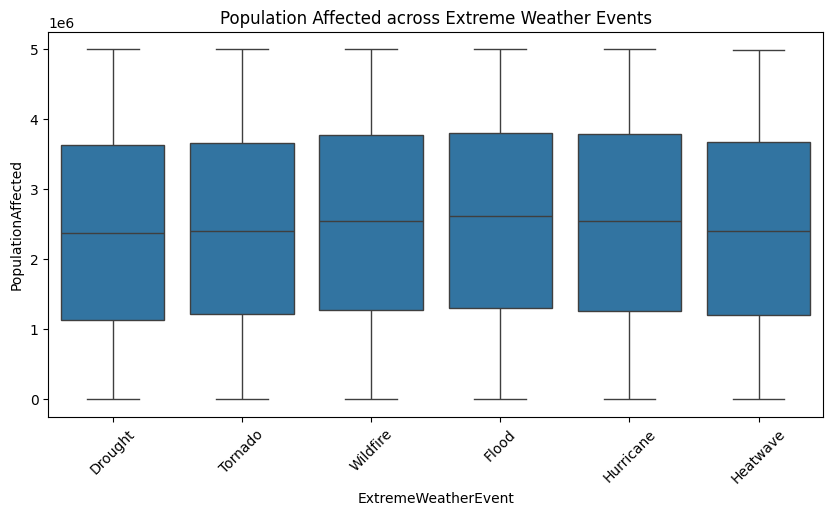

In [34]:
# 4. Boxplot of Population Affected by ExtremeWeatherEvent
plt.figure(figsize=(10,5))
sns.boxplot(x='ExtremeWeatherEvent', y='PopulationAffected', data=df)
plt.title("Population Affected across Extreme Weather Events")
plt.xticks(rotation=45)
plt.show()

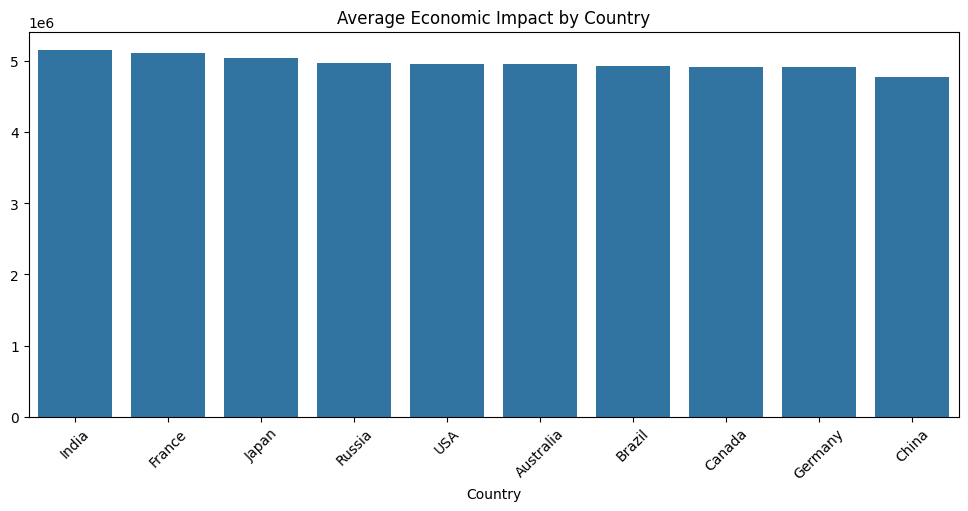

In [35]:
# 5. Bar plot of mean Economic Impact by Country
plt.figure(figsize=(12,5))
mean_econ_impact = df.groupby('Country')['EconomicImpact_USD'].mean().sort_values(ascending=False)
sns.barplot(x=mean_econ_impact.index, y=mean_econ_impact.values)
plt.title("Average Economic Impact by Country")
plt.xticks(rotation=45)
plt.show()

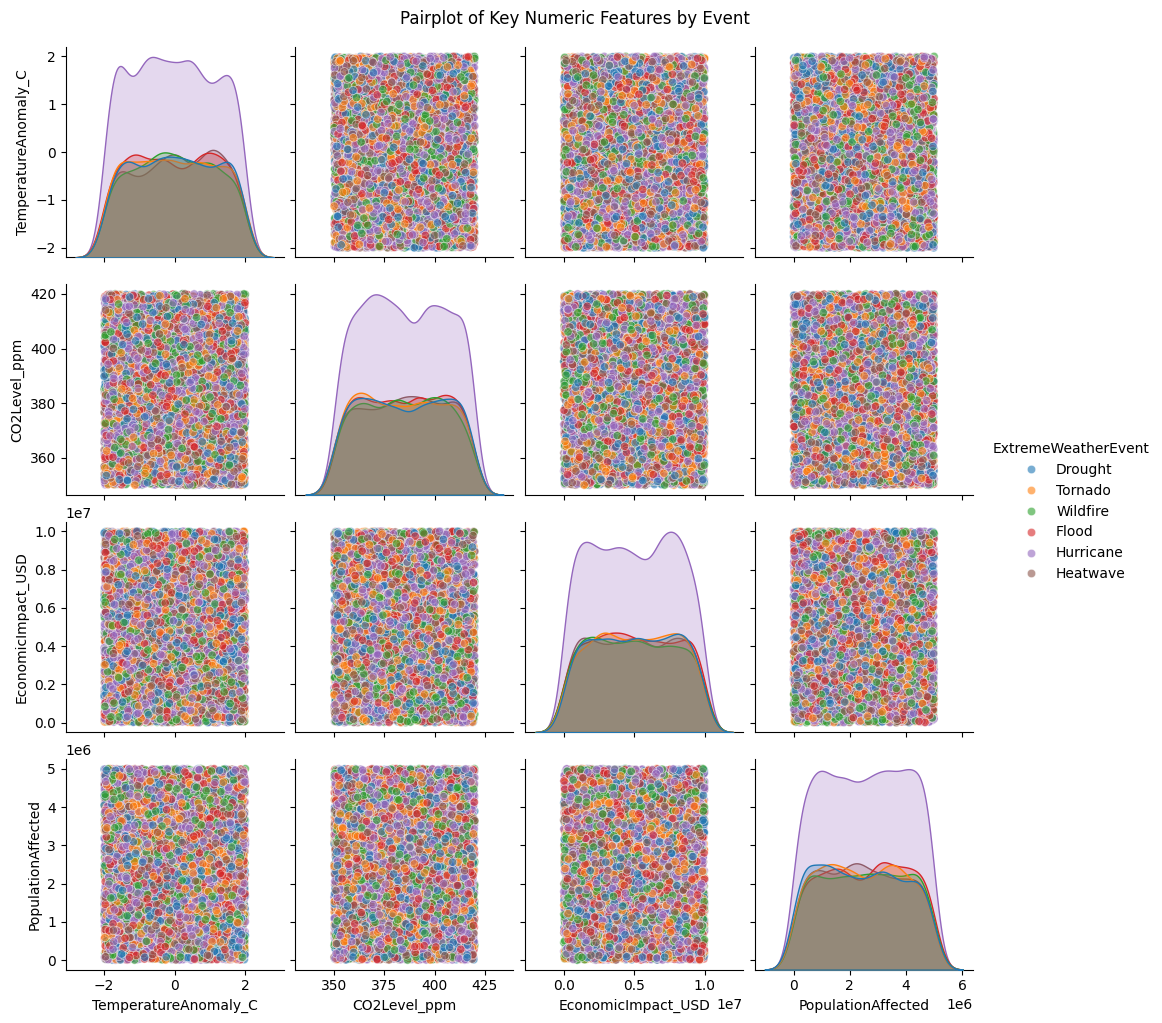

In [36]:
# Multivariate Analysis (5 plots)

# 1. Pairplot (scatter plots for numeric features colored by ExtremeWeatherEvent)
sns.pairplot(df[['TemperatureAnomaly_C', 'CO2Level_ppm', 'EconomicImpact_USD', 'PopulationAffected', 'ExtremeWeatherEvent']],
            hue='ExtremeWeatherEvent', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Key Numeric Features by Event", y=1.02)
plt.show()

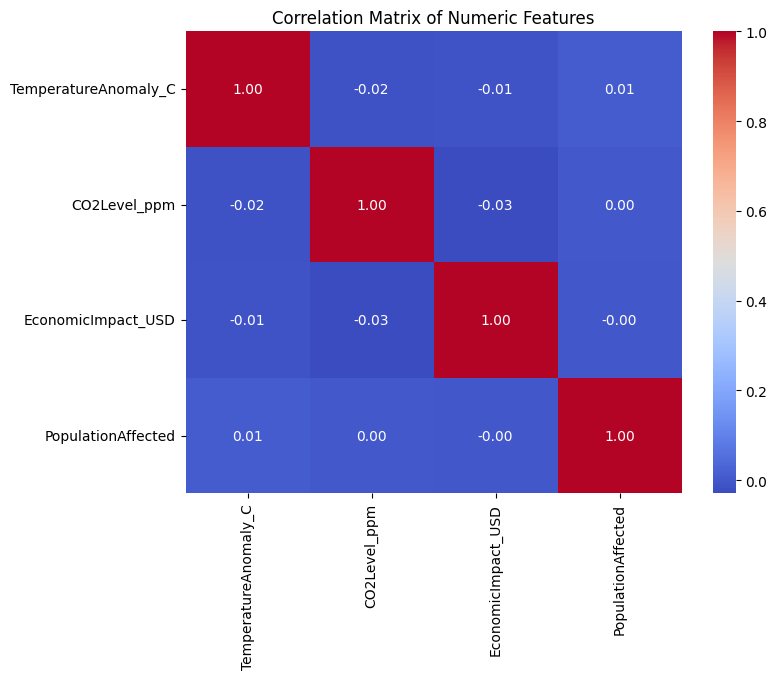

In [37]:
# 2. Heatmap of correlation matrix (numeric features)
plt.figure(figsize=(8,6))
sns.heatmap(df[['TemperatureAnomaly_C', 'CO2Level_ppm', 'EconomicImpact_USD', 'PopulationAffected']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

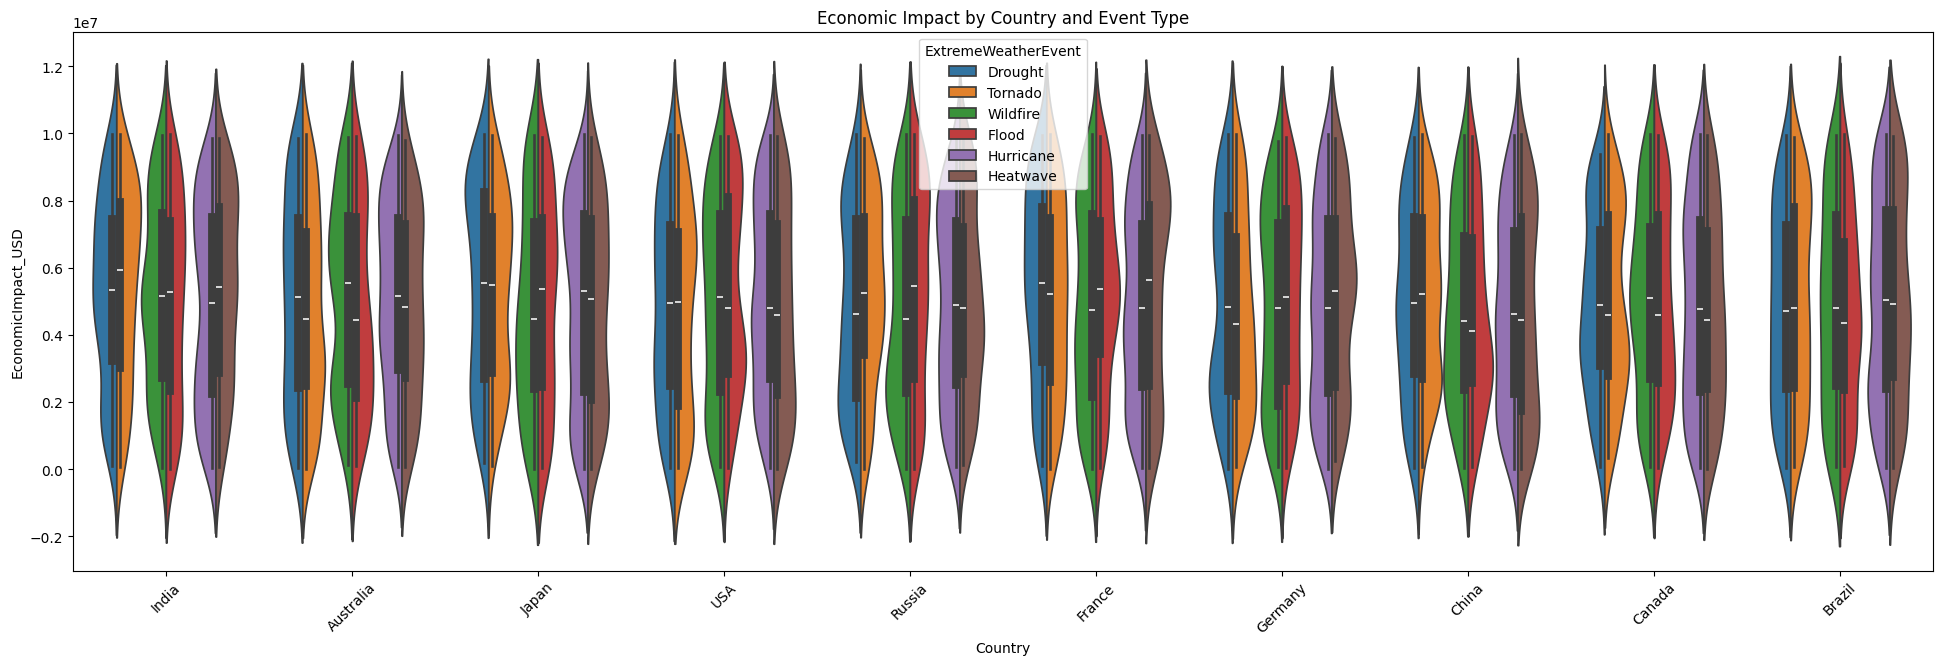

In [39]:
# 3. Violin plot of Economic Impact by ExtremeWeatherEvent and Country
plt.figure(figsize=(24,7))
sns.violinplot(x='Country', y='EconomicImpact_USD', hue='ExtremeWeatherEvent', data=df, split=True)
plt.title("Economic Impact by Country and Event Type")
plt.xticks(rotation=45)
plt.show()

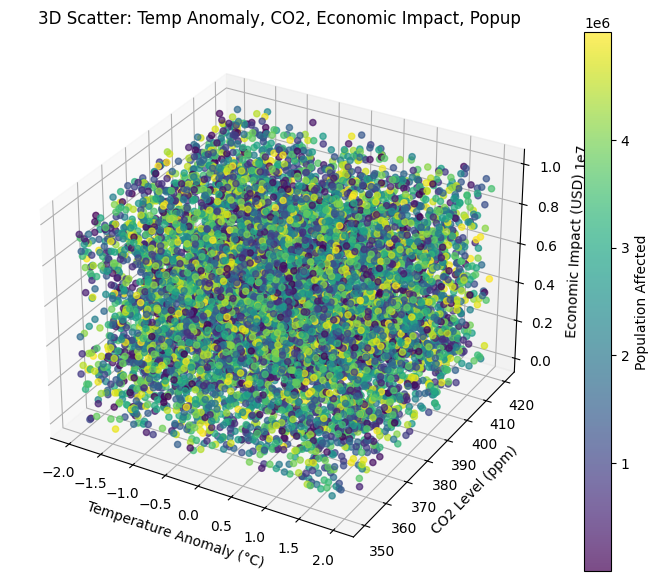

In [40]:
# 4. 3D scatter plot (requires mpl_toolkits.mplot3d)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['TemperatureAnomaly_C'], df['CO2Level_ppm'], df['EconomicImpact_USD'],
            c=df['PopulationAffected'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Temperature Anomaly (°C)')
ax.set_ylabel('CO2 Level (ppm)')
ax.set_zlabel('Economic Impact (USD)')
plt.colorbar(sc, label='Population Affected')
plt.title("3D Scatter: Temp Anomaly, CO2, Economic Impact, Popup")
plt.show()

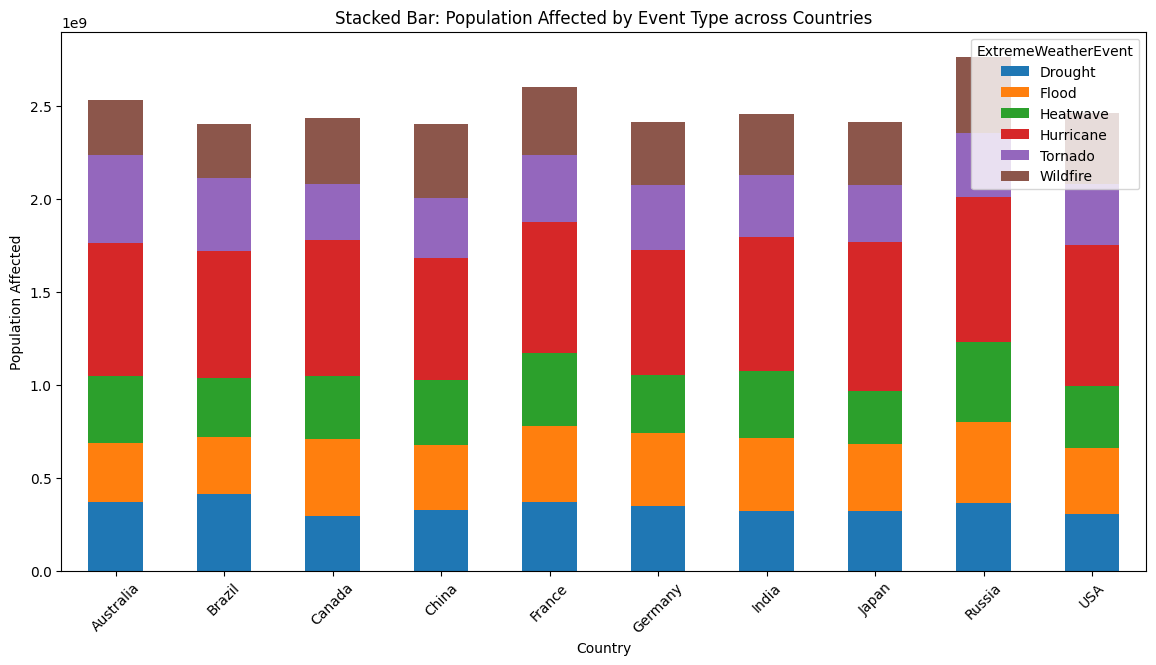

In [41]:
# 5. Stacked bar plot: Population affected by Event type across Countries
pop_event_country = df.groupby(['Country', 'ExtremeWeatherEvent'])['PopulationAffected'].sum().unstack().fillna(0)
pop_event_country.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title("Stacked Bar: Population Affected by Event Type across Countries")
plt.ylabel("Population Affected")
plt.xticks(rotation=45)
plt.show()